In [2]:
!pip install seaborn


     |████████████████████████████████| 286kB 1.3MB/s eta 0:00:01


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


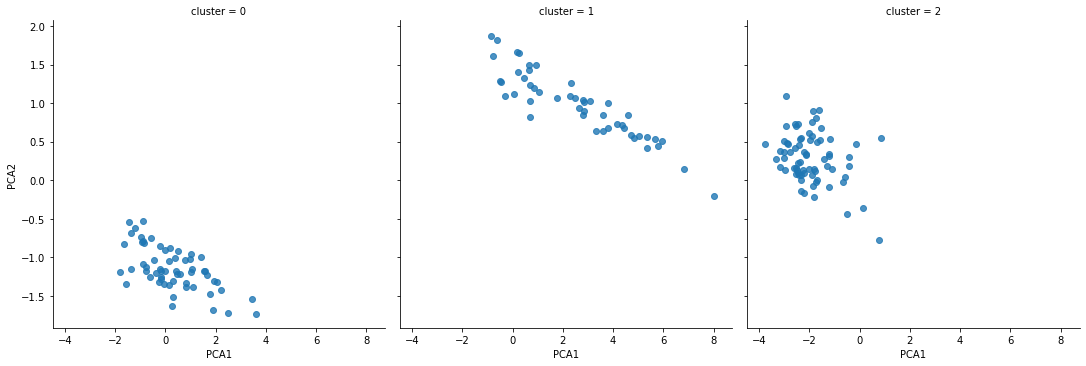

In [4]:
import pandas as pd
import seaborn as sns

data_df = pd.read_csv("./datasets/clustering.csv")
data_df.describe()
X_data = data_df.drop('class_1', axis=1)
y_data = data_df['class_1']

from sklearn.decomposition import PCA   

pca = PCA(n_components=2)               
pca.fit(X_data)                         
X_2D = pca.transform(X_data)            
data_df['PCA1'] = X_2D[:, 0]
data_df['PCA2'] = X_2D[:, 1]

from sklearn.mixture import GaussianMixture         

gm = GaussianMixture(n_components=3, covariance_type='full')     
gm.fit(X_data)                         
y_gm = gm.predict(X_data)              
data_df['cluster'] = y_gm
sns.lmplot("PCA1", "PCA2", data=data_df, col='cluster', fit_reg=False)